In [170]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [172]:
import shutil

shutil.copy('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/1-3лист.tsv', '.')

'./1-3лист.tsv'

In [255]:
df_1_3 = pd.read_csv('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/1-3лист.tsv',  sep='\t')

In [256]:
df_1_3Volume_true

,PatientID,Preprocessing step,Dataset,"NN-Architecture (nn-Unet, UNETR)","Label (WT, ET, TC, GTV)",Dice,Hausdorff,Surface Dice 1mm,Surface Dice 3mm,Surface Dice 5mm,Epoch,Volume_estimated,Volume_intersection,Volume_true
0,TCGA-02-0011,1_reg,gbm,nn_unet,WT,0.290,39.000,0.264,NaN,NaN,300,25.748,22.114,126.783
1,TCGA-02-0011,1_reg,gbm,nn_unet,ET,0.138,39.000,0.218,NaN,NaN,300,2.983,22.114,33.488
2,TCGA-02-0011,1_reg,gbm,nn_unet,TC,0.030,34.300,0.133,NaN,NaN,300,9.525,22.114,81.619
3,TCGA-02-0033,1_reg,gbm,nn_unet,WT,0.242,39.000,0.261,NaN,NaN,300,19.781,14.996,104.407
4,TCGA-02-0033,1_reg,gbm,nn_unet,ET,0.265,26.094,0.330,NaN,NaN,300,6.324,14.996,31.703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14347,TCGA-DU-8167,6_hist,lgg,UNETR,ET,0.739,9.593,0.237,NaN,NaN,300,NaN,NaN,NaN
14348,TCGA-DU-8167,6_hist,lgg,UNETR,TC,0.000,inf,0.000,NaN,NaN,300,NaN,NaN,NaN
14349,TCGA-DU-8168,6_hist,lgg,UNETR,WT,0.162,39.552,0.068,NaN,NaN,300,NaN,NaN,NaN
14350,TCGA-DU-8168,6_hist,lgg,UNETR,ET,0.049,42.500,0.034,NaN,NaN,300,NaN,NaN,NaN


In [174]:
df_1_3 = pd.read_excel('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/exp.xlsx', sheet_name='1-3')
df_4_bgpd_gbm = pd.read_excel('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/exp.xlsx', sheet_name='4 BGPD -> GBM')
df_4_gbm_bgpd = pd.read_excel('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/exp.xlsx', sheet_name='4 GBM -> BGPD')

In [175]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean()

/tmp/ipykernel_23420/3039216364.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean()


Preprocessing step
gbm_1_reg_train      0.423333
gbm_2a_interp        0.830931
gbm_3a_atlas         0.836020
gbm_4a_resamp_100    0.837206
gbm_4b_n4            0.827157
gbm_4d_susan         0.837922
gbm_5_ss_shared      0.860069
gbm_6_hist           0.820549
Name: Dice, dtype: float64

In [176]:
df_4_bgpd_gbm.groupby([ 'Preprocessing step']).mean().Dice

/tmp/ipykernel_23420/191290440.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_4_bgpd_gbm.groupby([ 'Preprocessing step']).mean().Dice


Preprocessing step
gbm_1_reg_train_from_bgpd_TL        0.431588
gbm_2a_interp_from_bgpd_TL          0.857539
gbm_3a_atlas_from_bgpd_TL           0.863745
gbm_4a_resamp_from_bgpd_TL          0.855892
gbm_4b_n4_from_bgpd_TL_last_bgpd    0.849775
gbm_4d_susan_from_bgpd_TL           0.862912
gbm_5_ss_shared_from_bgpd_TL        0.866824
gbm_6_hist_bgpd_TL                  0.835206
Name: Dice, dtype: float64

In [136]:
gbm_mean_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100

gbm_mean_300_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100

gbm_std_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.std().values, 2)*100

gbm_std_300_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.std().values, 2)*100

bgpd_gbm_mean_raw = np.round(df_4_bgpd_gbm.groupby([ 'Preprocessing step']).mean().Dice.values, 2)*100

bgpd_gbm_std_raw = np.round(df_4_bgpd_gbm.groupby([ 'Preprocessing step']).std().Dice.values, 2)*100

mean_transfer_raw=  bgpd_gbm_mean_raw - gbm_mean_100_raw

std_transfer_raw=  bgpd_gbm_std_raw - gbm_std_100_raw 

/tmp/ipykernel_23420/3712079836.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gbm_mean_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100
/tmp/ipykernel_23420/3712079836.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gbm_mean_300_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().values, 2)*100
/tmp/ipykernel_23420/3712079836.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  gbm_std_100_raw = np.round(df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].groupby([ 'Pre

In [132]:
gbm_mean_300_raw

array([83., 44., 85., 85., 85., 82., 84., 87.])

In [125]:
df_4_bgpd_gbm['Preprocessing step'].value_counts()

gbm_1_reg_train_from_bgpd_TL        102
gbm_2a_interp_from_bgpd_TL          102
gbm_3a_atlas_from_bgpd_TL           102
gbm_4a_resamp_from_bgpd_TL          102
gbm_4b_n4_from_bgpd_TL_last_bgpd    102
gbm_4d_susan_from_bgpd_TL           102
gbm_5_ss_shared_from_bgpd_TL        102
gbm_6_hist_bgpd_TL                  102
Name: Preprocessing step, dtype: int64

In [138]:
data_1.std()

0.11578983049030027

In [159]:
df_1_3['Preprocessing step'].value_counts()

1_reg          1794
2a_interp      1794
3a_atlas       1794
4a_resamp      1794
4b_n4          1794
4d_susan       1794
5_ss_shared    1794
6_hist         1794
Name: Preprocessing step, dtype: int64

In [268]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Epoch']==300][df_1_3['Preprocessing step']=='1_reg'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet']

,PatientID,Preprocessing step,Dataset,"NN-Architecture (nn-Unet, UNETR)","Label (WT, ET, TC, GTV)",Dice,Hausdorff,Surface Dice 1mm,Surface Dice 3mm,Surface Dice 5mm,Epoch,Volume_estimated,Volume_intersection,Volume_true
0,TCGA-02-0011,1_reg,gbm,nn_unet,WT,0.290,39.000,0.264,NaN,NaN,300,25.748,22.114,126.783
3,TCGA-02-0033,1_reg,gbm,nn_unet,WT,0.242,39.000,0.261,NaN,NaN,300,19.781,14.996,104.407
6,TCGA-02-0037,1_reg,gbm,nn_unet,WT,0.170,45.500,0.192,NaN,NaN,300,16.548,12.045,124.997
9,TCGA-02-0047,1_reg,gbm,nn_unet,WT,0.298,32.500,0.216,NaN,NaN,300,45.310,39.320,218.566
12,TCGA-02-0054,1_reg,gbm,nn_unet,WT,0.364,26.000,0.312,NaN,NaN,300,20.443,18.511,81.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,TCGA-76-6285,1_reg,gbm,nn_unet,WT,0.087,23.112,0.021,NaN,NaN,300,2.018,2.000,43.743
294,TCGA-76-6661,1_reg,gbm,nn_unet,WT,0.107,45.000,0.145,NaN,NaN,300,11.028,9.940,174.940
297,TCGA-76-6662,1_reg,gbm,nn_unet,WT,0.122,42.000,0.235,NaN,NaN,300,17.022,6.032,81.746
300,TCGA-76-6663,1_reg,gbm,nn_unet,WT,0.268,37.500,0.205,NaN,NaN,300,21.033,19.388,123.740


In [269]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Epoch']==300][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].Volume_true.mean()

91.26608455882354

In [270]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Epoch']==300][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].Volume_intersection.mean()

69.30123651960785

In [275]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Epoch']==300][df_1_3['Preprocessing step']=='4a_resamp'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].Volume_intersection.mean()

75.13541176470588

In [ ]:
91

In [266]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Epoch']==300][df_1_3['Preprocessing step']=='4a_resamp'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].Volume_true.mean()

88.99890196078432

In [182]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Preprocessing step']=='gbm_4d_susan']

/tmp/ipykernel_23420/2899323078.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Preprocessing step']=='gbm_4d_susan']


,PatientID,Preprocessing step,Dataset,"NN-Architecture (nn-Unet, UNETR)","Label (WT, ET, TC, GTV)",Dice,Hausdorff,Surface Dice 1mm,Surface Dice 3mm,Surface Dice 5mm,Epoch
5430,TCGA-02-0011,gbm_4d_susan,gbm,nn_unet,WT,0.920,16.503,0.754,NaN,NaN,100
5433,TCGA-02-0033,gbm_4d_susan,gbm,nn_unet,WT,0.939,4.207,0.873,NaN,NaN,100
5436,TCGA-02-0037,gbm_4d_susan,gbm,nn_unet,WT,0.676,16.701,0.279,NaN,NaN,100
5439,TCGA-02-0047,gbm_4d_susan,gbm,nn_unet,WT,0.917,6.500,0.784,NaN,NaN,100
5442,TCGA-02-0054,gbm_4d_susan,gbm,nn_unet,WT,0.916,3.906,0.848,NaN,NaN,100
...,...,...,...,...,...,...,...,...,...,...,...
17451,TCGA-76-6285,gbm_4d_susan,gbm,nn_unet,WT,0.768,7.140,0.601,NaN,NaN,100
17454,TCGA-76-6661,gbm_4d_susan,gbm,nn_unet,WT,0.797,30.580,0.503,NaN,NaN,100
17457,TCGA-76-6662,gbm_4d_susan,gbm,nn_unet,WT,0.912,5.031,0.803,NaN,NaN,100
17460,TCGA-76-6663,gbm_4d_susan,gbm,nn_unet,WT,0.891,73.006,0.689,NaN,NaN,100


If the pvalue is smaller than a threshold, say 0.05, then we reject the hypothesis that the difference between the two samples is larger than the the thresholds given by low and upp.

pvalue 0.07, we dont reject the hipothesis that the difference is larger that 0.25 and 0.25. we dont reject the hipothesis that the difference is within 0.25 and 0.25. difference is within 0.25 and 0.25

'1_reg'

If the pvalue is smaller than a threshold, say 0.05, then we reject the hypothesis that the difference between the two samples is larger than the the thresholds given by low and upp.

small - reject the hypothesis that there is difference
big - accept the hypothesis the there is a difference

In [222]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
import statsmodels
from statsmodels.stats.weightstats import ttost_ind
from researchpy import ttest

preproc_1 = "4a_resamp"
for key in df_1_3['Preprocessing step'].value_counts().keys():
    preproc_2 = key
    
    if key != "4a_resamp":
        print(preproc_2)

        df_1_3 = pd.read_csv('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/1-3лист.tsv',  sep='\t')

        data_1 = df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Preprocessing step']==preproc_1]['Dice']
        data_2 = df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Preprocessing step']==preproc_2]['Dice']

        print(np.round(data_1.mean(),3), np.round(data_1.std(),3), np.round(data_2.mean(),3), np.round(data_2.std(),3),)
        ttost = ttost_ind(data_1, data_2, -data_2.std()/4, data_2.std()/4)[0]/7
        ttest_ = ttest(data_1, data_2,  equal_variances = False, paired=True)[1].values[4][1]*7
        print("If more than 0.05", ttost > 0.05, np.round(ttost,3))
        print( "If less than 0.05", ttest_ < 0.05, np.round(ttest_,3))

1_reg
0.85 0.116 0.436 0.277
If more than 0.05 True 0.143
If less than 0.05 True 0.0
2a_interp
0.85 0.116 0.848 0.114
If more than 0.05 False 0.007
If less than 0.05 False 1.215
3a_atlas
0.85 0.116 0.846 0.113
If more than 0.05 False 0.009
If less than 0.05 False 0.186
4b_n4
0.85 0.116 0.824 0.131
If more than 0.05 False 0.049
If less than 0.05 True 0.001
4d_susan
0.85 0.116 0.845 0.116
If more than 0.05 False 0.01
If less than 0.05 True 0.027
5_ss_shared
0.85 0.116 0.866 0.107
If more than 0.05 False 0.036
If less than 0.05 True 0.019
6_hist
0.85 0.116 0.833 0.161
If more than 0.05 False 0.017
If less than 0.05 False 0.629


In [247]:
data_transfer = pd.read_csv('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/bgpd-gbm.tsv',  sep='\t')

In [252]:
corr = 2
for key in df_1_3['Preprocessing step'].value_counts().keys():
    preproc_2 = key
    
    if key != "4a_resamp":
        print(preproc_2)

        df_1_3 = pd.read_csv('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/1-3лист.tsv',  sep='\t')

        data_1 = df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Preprocessing step']==preproc_2]['Dice']
        
        df_1_3 = pd.read_csv('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/bgpd-gbm.tsv',  sep='\t')
        
        data_2 = df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['Preprocessing step']==preproc_2]['Dice']

        
        
        print(np.round(data_1.mean(),3), np.round(data_1.std(),3), np.round(data_2.mean(),3), np.round(data_2.std(),3),)
        ttost = ttost_ind(data_1, data_2, -data_2.std()/4, data_2.std()/4)[0]/corr
        ttest_ = ttest(data_1, data_2,  equal_variances = False, paired=True)[1].values[4][1]*corr
        print("If more than 0.05", ttost > 0.05, np.round(ttost,3))
        print( "If less than 0.05", ttest_ < 0.05, np.round(ttest_,3))

1_reg
0.436 0.277 0.432 0.27
If more than 0.05 False 0.025
If less than 0.05 False 0.842
2a_interp
0.848 0.114 0.858 0.103
If more than 0.05 True 0.075
If less than 0.05 False 0.683
3a_atlas
0.846 0.113 0.864 0.102
If more than 0.05 True 0.154
If less than 0.05 True 0.0
4b_n4
0.824 0.131 0.85 0.113
If more than 0.05 True 0.222
If less than 0.05 True 0.0
4d_susan
0.845 0.116 0.863 0.102
If more than 0.05 True 0.16
If less than 0.05 True 0.001
5_ss_shared
0.866 0.107 0.867 0.112
If more than 0.05 False 0.02
If less than 0.05 False 0.274
6_hist
0.833 0.161 0.835 0.158
If more than 0.05 False 0.024
If less than 0.05 False 0.806


In [70]:
data_1.mean(), data_1.std(), data_2.mean(), data_2.std()

(0.3740686274509804,
 0.29611262202453437,
 0.3672941176470589,
 0.2857555394731862)

In [72]:
df_4_bgpd_gbm['Preprocessing step'].value_counts()

gbm_1_reg_train_from_bgpd_TL        102
gbm_2a_interp_from_bgpd_TL          102
gbm_3a_atlas_from_bgpd_TL           102
gbm_4a_resamp_from_bgpd_TL          102
gbm_4b_n4_from_bgpd_TL_last_bgpd    102
gbm_4d_susan_from_bgpd_TL           102
gbm_5_ss_shared_from_bgpd_TL        102
gbm_6_hist_bgpd_TL                  102
Name: Preprocessing step, dtype: int64

In [54]:
df_4_bgpd_gbm[df_4_bgpd_gbm['Preprocessing step'] =='gbm_1_reg_train_from_bgpd_TL']['Dice']

0      0.279
1      0.235
2      0.146
3      0.299
4      0.328
       ...  
97     0.082
98     0.000
99     0.123
100    0.264
101    0.221
Name: Dice, Length: 102, dtype: float64

In [41]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='ET'][df_1_3['Preprocessing step']=='gbm_1_reg_train']['Dice']

/tmp/ipykernel_23420/4158688124.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='gbm'][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'][df_1_3.Epoch==300][df_1_3['Label (WT, ET, TC, GTV)']=='ET'][df_1_3['Preprocessing step']=='gbm_1_reg_train']['Dice']


1453     0.138
1456     0.265
1459     0.179
1462     0.349
1465     0.055
         ...  
13474    0.000
13477    0.031
13480    0.004
13483    0.319
13486    0.012
Name: Dice, Length: 204, dtype: float64

In [ ]:
df_1_3[df_1_3.Dataset=='gbm'][df_1_3.Epoch==100][df_1_3['Label (WT, ET, TC, GTV)']=='WT'][df_1_3['NN-Architecture (nn-Unet, UNETR)']=='nn_unet'].g([ 'Preprocessing step']).Dice.mean().values

In [14]:
gbm_mean_100_raw, gbm_std_100_raw

(array([42., 83., 84., 84., 83., 84., 86., 82.]),
 array([27., 13., 12., 13., 13., 12., 11., 16.]))

In [15]:
mean_transfer_raw

array([1., 3., 2., 2., 2., 2., 1., 2.])

In [16]:
std_transfer_raw

array([ 0., -3., -2., -2., -2., -2.,  0.,  0.])

In [96]:
mean_100 = np.array([42, 83, 84, 84, 83, 84, 82, 86])
std_100 =  np.array([27, 13, 12, 13, 13, 12, 16, 11])

mean_transfer = np.array([1, 3, 2, 2, 2, 2, 2, 1])
std_transfer = np.array([0,-3, -2, -2, -2, -2, 0, 0])

mean_transfer = mean_100 + mean_transfer
std_transfer = std_100 + std_transfer

mean_300 = np.array([44, 85, 85, 85, 82, 84, 83, 87])
std_300 =  np.array([28, 11, 11, 12, 13, 12, 16, 11])

y = np.array([1,2,3,4,5,6,7,8])*3

ylabel = ['1. Inter-modality\nregistration', '2. Resampling to \nimage size',
         '3. Atlas \nregistration', '4. Resampling to \nspacing', '4.a Bias field \ncorrection',
         '4.b Denoising', '4.c Histogram \n matching', '4.d Skull \nstripping',]

In [100]:
i = 5
print( ylabel[i])
print( mean_100[i], std_100[i])
print( mean_300[i], std_300[i])
print( mean_transfer[i], std_transfer[i])

4.b Denoising
84 12
84 12
86 10


In [3]:
def plot_err_bar(x, y, error, c, label, marker="o"):
    plt.scatter(x, y, c=c, s=40, marker = marker, label=label)
    for _x, _y, err in zip(x,y,error):
        plt.plot([_x-err/2, _x+err/2], [_y, _y], c=c, alpha=0.5, lw=3)

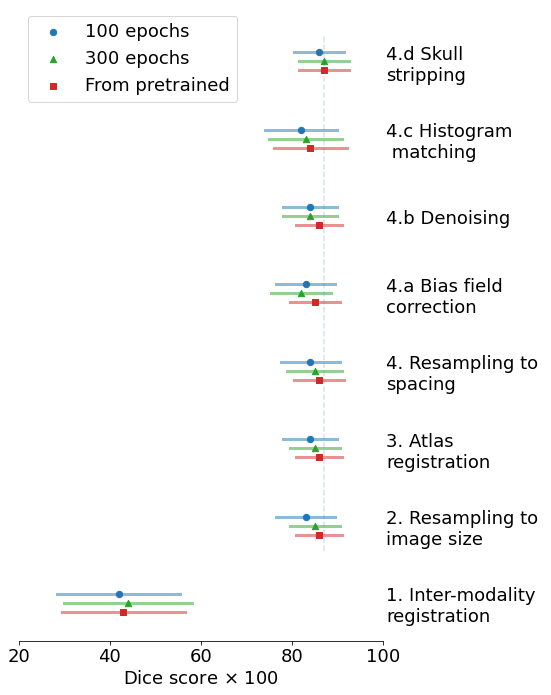

In [5]:
font = {'size'   : 18, }
plt.rc('font', **font)
# plt.rcParams["mathtext.fontset"] = 'dejavusans'


plt.figure(figsize=(8,10))
plot_err_bar(mean_100, y+0.35, std_100, c='tab:blue', label='100 epochs' ,marker='o')
plot_err_bar(mean_300, y, std_300, c='tab:green', label='300 epochs', marker='^')
plot_err_bar(mean_transfer, y-0.35, std_transfer, c='tab:red', label='From pretrained', marker='s')
plt.yticks(ticks = y, labels=ylabel)

plt.xlim(20, 100)
plt.xlabel('Dice score ' + r'$ \times \ 100$')


# Hide the right and top spines
ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis=u'y', which=u'both',length=0)
plt.plot([87, 87], [5,25], ls='--', alpha=0.2)

plt.legend(loc='best');
plt.tight_layout()

plt.savefig('/home/anvar/GBM_error_bars.png', dpi=300)

# plt.savefig('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/error_bars.png')
# First, traning for 300 epochs until convergence is always better than training for 100 epochs.
# Second, training until convergence from pre-trained weights from a larger dataset is always beneficial,
# and result both in better mean Dice score and lower standard deviation.
# Third, experiment with skull stripping is the only one statistically significantly better than the baseline experiment 
# (Resampling to spacing 1x1x1 mm), though it benefits from pretraining less than any other setups.
# Finally, we observe that with training from a pretrained state the differences between the setup
# with and without skull stripping are washed away.

BGPD

In [42]:
df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().round(2)*100

/tmp/ipykernel_10627/1095442191.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.mean().round(2)*100


Preprocessing step
bgpd_1_reg          34.0
bgpd_2a_interp      71.0
bgpd_3a_atlas       72.0
bgpd_4a_resamp      72.0
bgpd_4b_n4_last     72.0
bgpd_4d_susan       71.0
bgpd_5_ss_shared    76.0
bgpd_6_hist         72.0
Name: Dice, dtype: float64

In [43]:
df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.std().round(2)*100

/tmp/ipykernel_10627/873381767.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100][df_1_3['NN-Architecture (nn-Unet, UNETR)']== 'nn_unet'].groupby([ 'Preprocessing step']).Dice.std().round(2)*100


Preprocessing step
bgpd_1_reg          28.0
bgpd_2a_interp      18.0
bgpd_3a_atlas       19.0
bgpd_4a_resamp      18.0
bgpd_4b_n4_last     17.0
bgpd_4d_susan       19.0
bgpd_5_ss_shared    15.0
bgpd_6_hist         16.0
Name: Dice, dtype: float64

In [48]:
tl_bgpd_mean = df_4_gbm_bgpd.groupby([ 'Preprocessing step']).Dice.mean().values
bgpd_mean = df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100].groupby([ 'Preprocessing step']).Dice.mean()

/tmp/ipykernel_10627/757254603.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bgpd_mean = df_1_3[df_1_3.Dataset=='bgpd'][df_1_3.Epoch==100].groupby([ 'Preprocessing step']).Dice.mean()


In [41]:
(tl_bgpd_mean - bgpd_mean).round(2)*100

array([ 2.,  3.,  2., -0.,  1.,  2., -1.,  2.])

In [101]:
mean_100 = np.array([34, 71, 72, 72, 72, 71, 72, 76])
std_100 =  np.array([28, 18, 19, 18, 17, 19, 16, 15])

mean_transfer = np.array([2, 3, 2, 0, 1, 2, 2, -1])
std_transfer = np.array([1, 1, -2, 1, 1, 0, 0, 1])

mean_transfer = mean_100 + mean_transfer
std_transfer = std_100 + std_transfer


mean_300 = np.array([36, 73, 75, 74, 75, 74, 75, 76])
std_300 =  np.array([29, 19, 16, 18, 17, 17, 16, 14])

y = np.array([1,2,3,4,5,6,7,8])*3

ylabel = ['1. Inter-modality\nregistration', '2. Resampling to \nimage size',
         '3. Atlas \nregistration', '4. Resampling to \nspacing', '4.a Bias field \ncorrection',
         '4.b Denoising', '4.c Histogram \n matching', '4.d Skull \nstripping']

In [108]:
i = 0
print( ylabel[i])
print( mean_100[i], std_100[i])
print( mean_300[i], std_300[i])
print( mean_transfer[i], std_transfer[i])

1. Inter-modality
registration
34 28
36 29
36 29


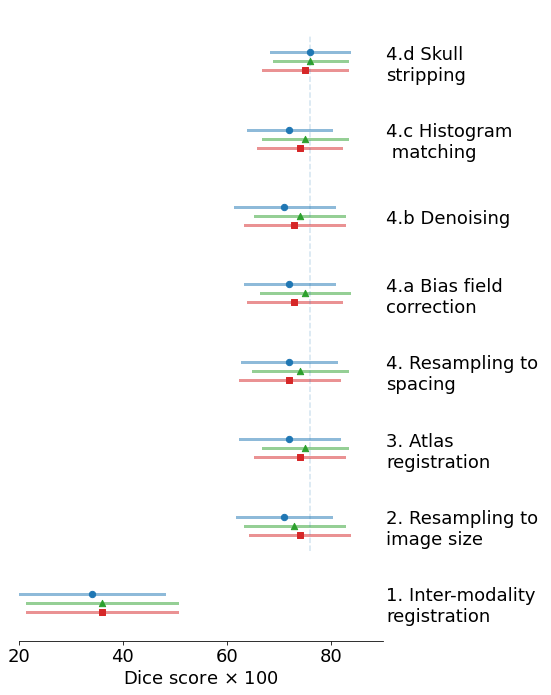

In [8]:
font = {'size'   : 18, }
plt.rc('font', **font)
# plt.rcParams["mathtext.fontset"] = 'dejavusans'


plt.figure(figsize=(8,10))
plot_err_bar(mean_100, y+0.35, std_100, c='tab:blue', label='100 epochs' ,marker='o')
plot_err_bar(mean_300, y, std_300, c='tab:green', label='300 epochs', marker='^')
plot_err_bar(mean_transfer, y-0.35, std_transfer, c='tab:red', label='From pretrained', marker='s')
plt.yticks(ticks = y, labels=ylabel)

plt.xlim(20, 90)
plt.xlabel('Dice score ' + r'$ \times \ 100$')


# Hide the right and top spines
ax = plt.gca()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(axis=u'y', which=u'both',length=0)
plt.plot([76, 76], [5,25], ls='--', alpha=0.2)

# plt.legend(loc='best');
plt.tight_layout()


plt.savefig('/home/anvar/BGPD_error_bars.png', dpi=300)

# plt.savefig('/home/polina/DeepLearningExamples/PyTorch/Segmentation/nnUNet/metrics/error_bars_bgpd.png')

# First, traning for 300 epochs until convergence is always better than training for 100 epochs.
# Second, training until convergence from pre-trained weights from a smaller dataset, while not necessarily
# result in better mean Dice score, always decreses prediction standard deviation.
# Third, experiment with skull stripping is the only one statistically significantly better than the baseline experiment 
# (Resampling to spacing 1x1x1 mm), though it benefits from pretraining less than any other setups.
# Finally, we observe that with training from a pretrained state the differences between the setup
# with and without skull stripping are washed away.